# Term Deposit Sale 

**Based on the data related with direct marketing campaigns of a Portuguese banking institution**

# Context:

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

# Objective:

Using the data collected from existing customers, model construction that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Data Description:

***Sorce:https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

- Out of the 45,211 customer samples in the dataset, 88.3% were negative class samples, and the rest 11.7% were positive class samples (i.e. customers who ended up buying).
- The dataset consists of 10 numerical and 8 categorical attributes.
- The 'Revenue' attribute can be used as the class label.


**Attribute information**

- Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
--------------------------------------------------------
- Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds
**Important: this attribute cannot be used for realistic modeling, according to the data source:
 - `Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.`
--------------------------------------------------------
- Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
---------------------------------------------------------
 - Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)




------------------------
# Content
------------------------
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2> EDA: Univariate Analysis </a>
- 3. <a href = #link3>Data Visualization (Univariate Analysis) </a>
- 4. <a href = #link4>Data Visualization (Multivariate Analysis ) </a>
- 5. <a href = #link5>Data Preparation (Transformation and Scaling) </a>
- 6. <a href = #link6>Predictive Algorithms</a>
- 7. <a href = #link7>Conclusion</a>

## Dependencies

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [122]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv('bank-full.csv')                    # Load the dataset, provide the suitable folder path to dataset in it.

# <a id='link1'>Overview of the data</a>

In [5]:
df.head()                                                                     # Check the first 5 rows of dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape                                                                      # Check the shape of the dataset.

(45211, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

#### Check the duplicate data

In [10]:
df[df.duplicated()].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [12]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

### Insights:
 - No NA values and no duplicates.
 - 'pdays' majority inputs = -1, which is not been contacted or contact period is beyond 900 days.
 - All non-numerical (object) values need to be converted to categoricals.
 - 'balance' is highly unbalnced (skewed to the right (tail to higher values)) and have negative values = owes money to the bank (per my understanding).
 - 'campaign' is also highly unbalnced (skewed to the right (tail to higher values)).
 - most of values for 'pdays' are -1 with few higher values (can be coverted to few categories instead).
 - most of values for 'previous' are 0 with few higher values (can be coverted to few categories instead).

In [13]:
# Convert objects to categorical

for i in list(df.columns[df.dtypes=='object']):  
    df[i]=df[i].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# <a id='link2'>EDA: Univariate Analysis</a>

In [16]:
# Value counts of all categorical columns

for i in list(df.columns[df.dtypes=='category']):  
    print(df[i].value_counts(normalize=True)*100)  
    print()

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

no     98.197341
yes     1.802659
Name: default, dtype: float64

yes    55.583818
no     44.416182
Name: housing, dtype: float64

no     83.977351
yes    16.022649
Name: loan, dtype: float64

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227

#### Insights:
 - most popular jobs types: blue-collar, management, technician, admin. and services.
 - majority are married.
 - education = secondary is the most common.
 - majory = no credit in default.
 - roughly half owe houses.
 - 16% are holding loans.
 - 'cellular' is the most polular contact type.
 - Most activities were recorded in may and summer months, following up by november.
 - Majority 'poutcome' (previous outcome) type is 'unknown'.
 - 11.7% acquired the product.

In [17]:
# Value counts of all int columns

for i in list(df.columns[df.dtypes==int]):  
    print(df[i].value_counts(normalize=True)*100)  
    print()
    

32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
        ...   
90    0.004424
92    0.004424
93    0.004424
95    0.004424
94    0.002212
Name: age, Length: 77, dtype: float64

0        7.772445
1        0.431311
2        0.345049
4        0.307447
3        0.296388
           ...   
4305     0.002212
6352     0.002212
18881    0.002212
14889    0.002212
7218     0.002212
Name: balance, Length: 7168, dtype: float64

20    6.087014
18    5.104952
21    4.481210
17    4.288779
6     4.273296
5     4.224636
14    4.087501
8     4.074230
28    4.047688
7     4.018933
19    3.886222
29    3.859680
15    3.766782
12    3.545597
13    3.505784
30    3.463759
9     3.452700
11    3.271328
4     3.196125
16    3.129769
2     2.859923
27    2.479485
3     2.386587
26    2.289266
23    2.076928
22    2.001725
25    1.857955
31    1.422220
10    1.159010
24    0.988697
1     0.712216
Name: day, dtype: float64

124     0.415828
90      0.406981
89      0.391498
122     0.

#### Insights:
 - average 'age' range is 30-40 years old, which is normal.
 - 'balance' is highly unbalnced with most values around 0.
 - common 'day' values around mid of month, which is normal.
 - ignoring 'duration' as non-legit for the modeling.
 - 'campaign' is highly unbalnced (skewed to the right) with most of the values of "1", "2" and "3" only.
 - most of values for 'pdays' (number of days that passed by after the client was last contacted) are -1 (81.74%) with few higher values. This attribute will be coverted to two categories instead.
 - most of values for 'previous' (number of times the client has been contacted before) are 0 (81.74%) with few higher values.
 - 'pdays'=-1 and 'previous'=0 have exactly the same percentage in the dataset of 81.74%, so that 'pdays'=-1 can be replaced by 0, meaning the client has not been recently contacted (or contact period is beyond 900 days).

In [19]:
df.loc[df['pdays'] == -1, 'pdays'] = 0
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


# <a id='link3'>Data Visualization (Univariate Analysis)</a>

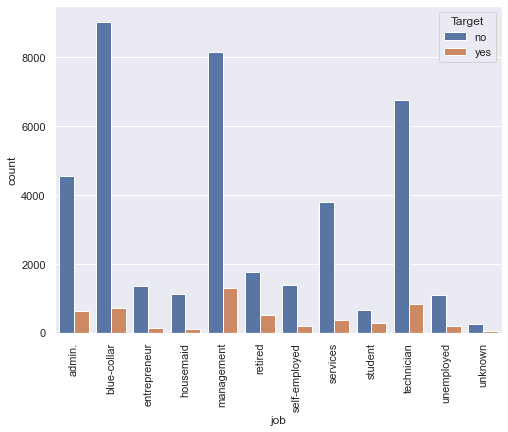

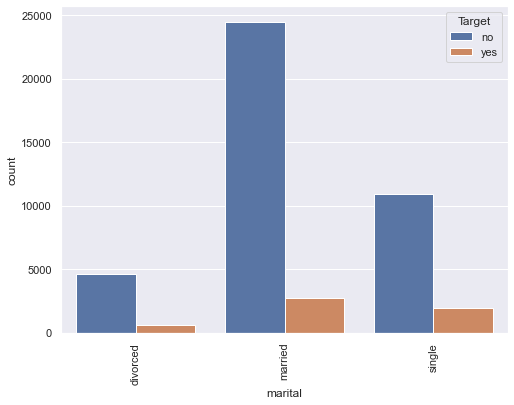

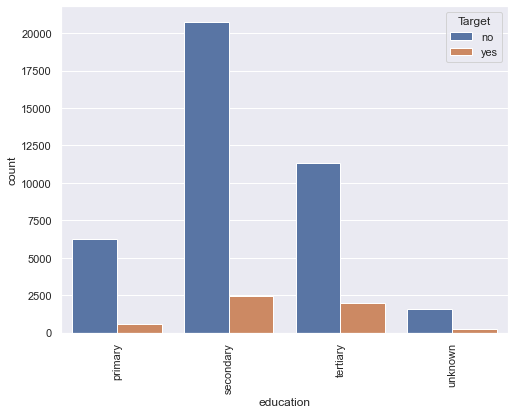

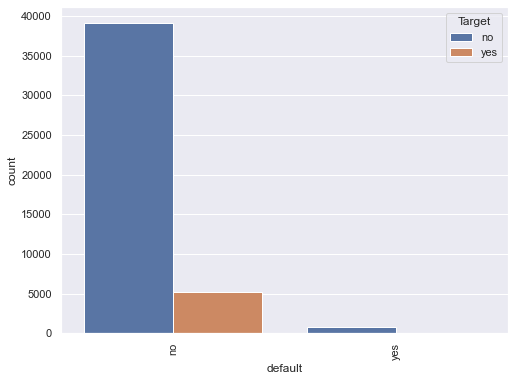

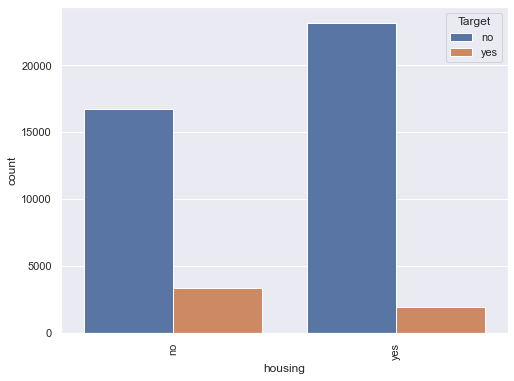

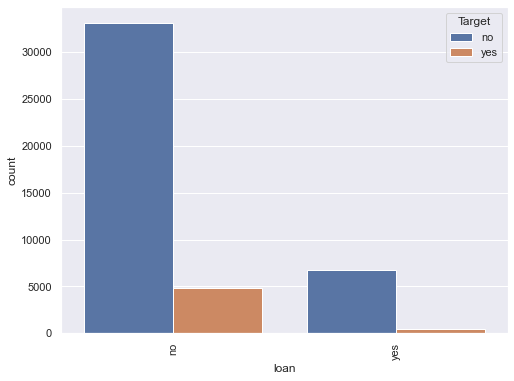

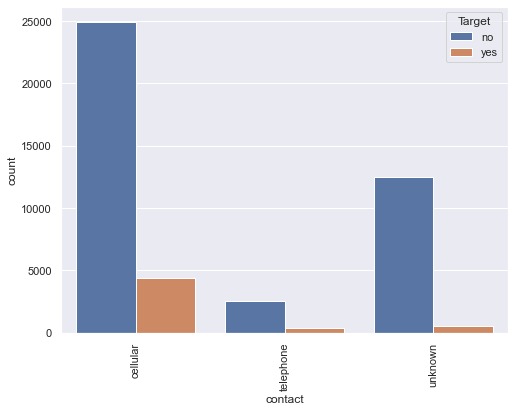

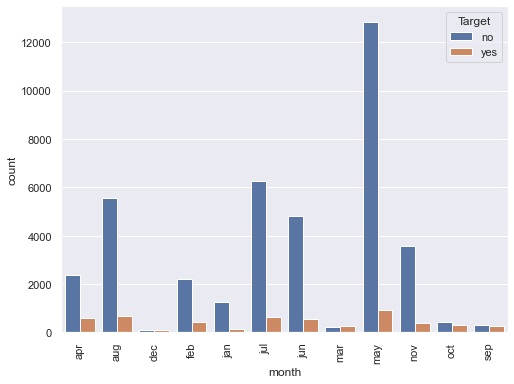

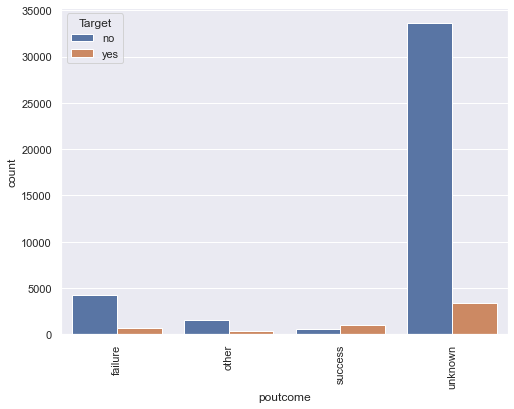

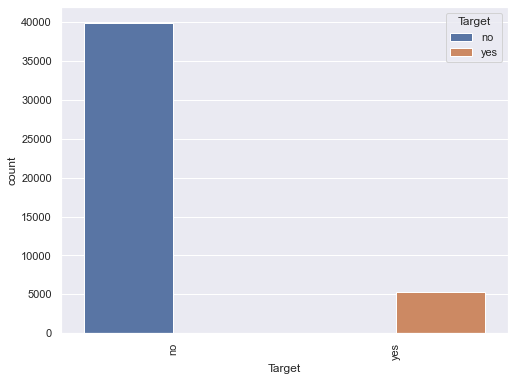

In [20]:
# Count plots for all categoricals

for i in list(df.columns[df.dtypes=='category']):  
    sns.set(rc={'figure.figsize':(8,6)})
    sns.countplot(data=df, x=i, hue='Target')
    plt.xticks(rotation='90')
    plt.show()

### Insights:

- Job types: looks like more 'yes' for management, blue-color, technician, admin. and retired, although these are the most polular job types in the dataset.
- 'Singles' tend more toward 'yes'.
- 'Tertiary' education tend more toward 'yes'.
- No sales for those who has credit in defualt (default=yes).
- Wihtout housing seem tend toward 'yes.
- Most of the clients don't hold a loan.
- 'Cellular' is the most popular type of contact.
- Good months for sales are april, may, summer months and november.
- Most of clients have 'unknown' previous contact type.

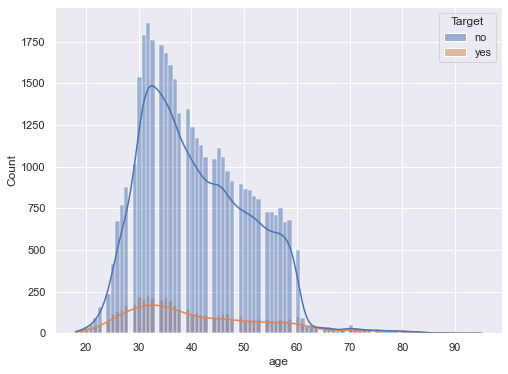

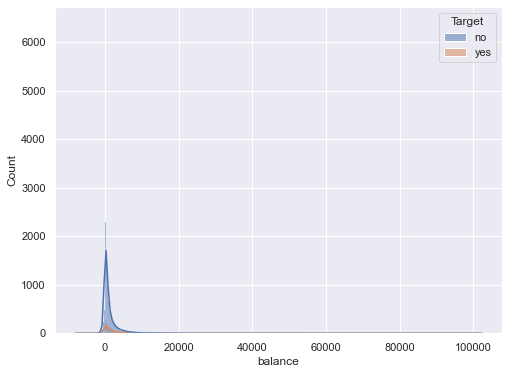

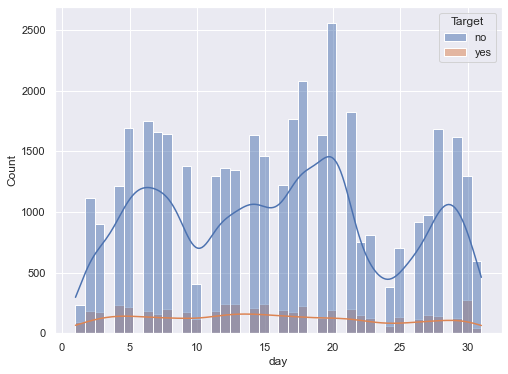

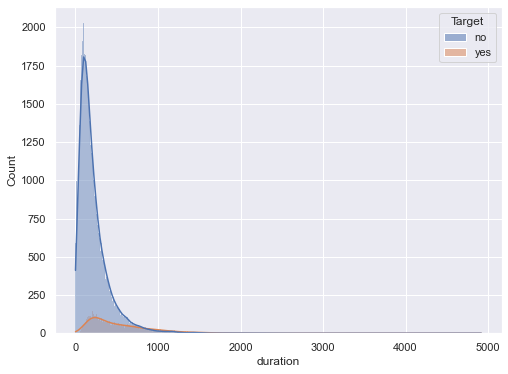

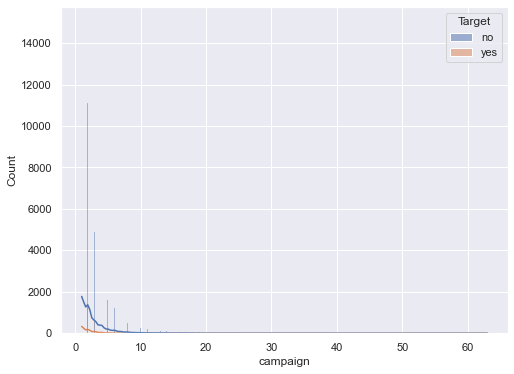

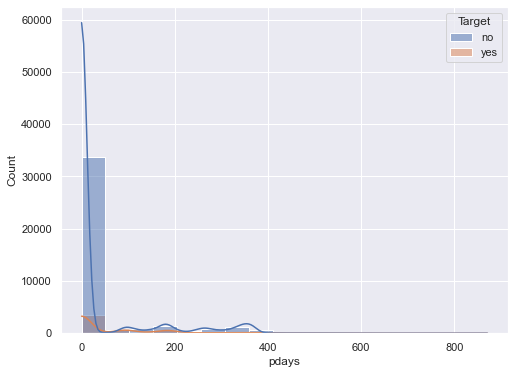

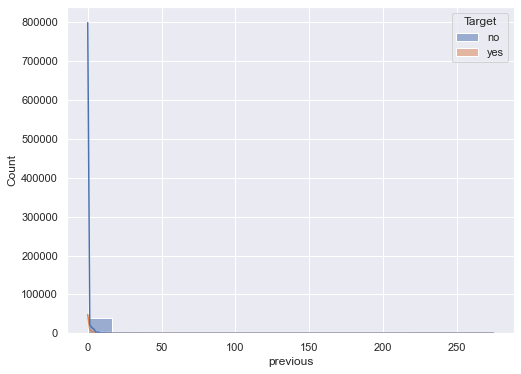

In [22]:
# Histogram plots for numerical values

for i in list(df.columns[df.dtypes==int]):  
    sns.set(rc={'figure.figsize':(8,6)})
    
    sns.histplot(data=df,x=i, kde=True, hue='Target')
    plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

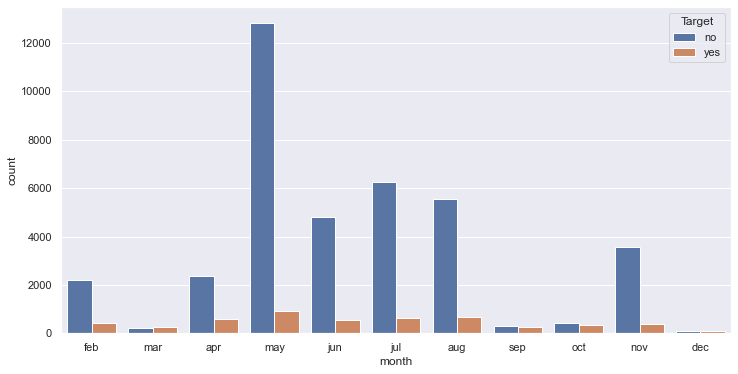

In [26]:
month=['feb', 'mar', 'apr', 'may','jun', 'jul', 'aug','sep','oct', 'nov','dec']
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df,x='month', order=month, hue='Target')

In [23]:
yes_target=df.loc[df['Target']=='yes']
no_target=df.loc[df['Target']=='no']

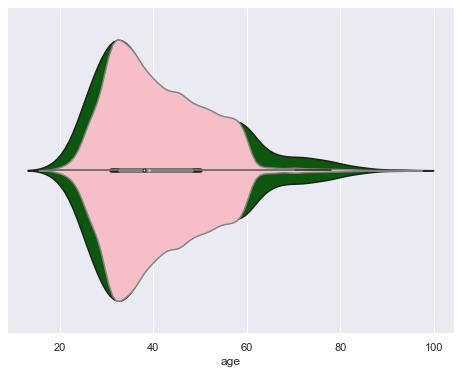

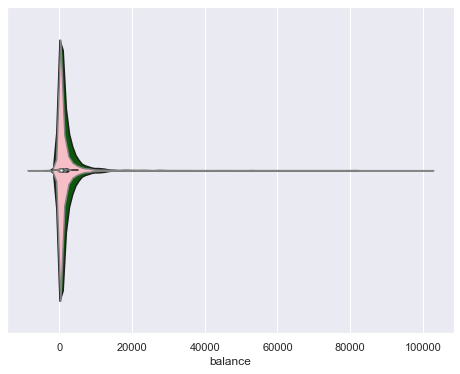

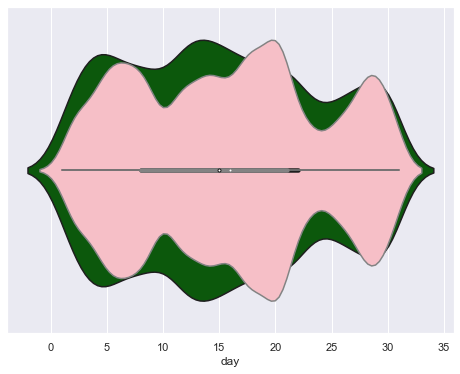

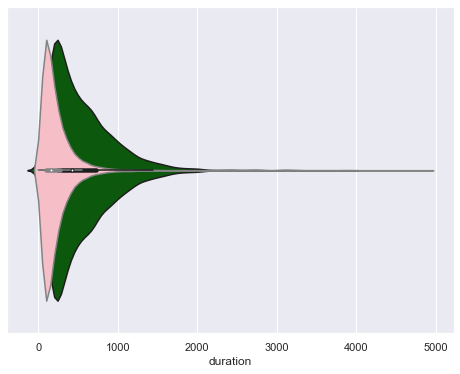

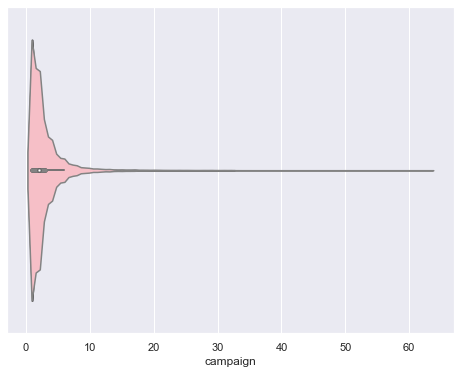

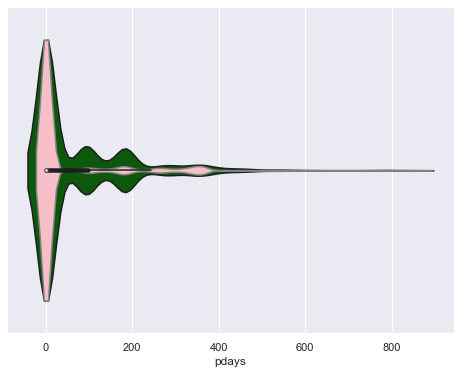

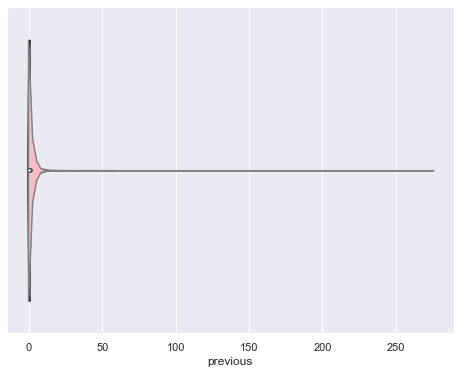

In [24]:
# Violin plots for numerical values, when divided into separete 'yes' and 'no' datasets

for i in list(df.columns[df.dtypes==int]):  
    sns.set(rc={'figure.figsize':(8,6)})
    sns.violinplot(data=yes_target,x=i, kde=True, color="darkgreen")
    sns.violinplot(data=no_target,x=i, kde=True, color="lightpink")

    plt.show()

### Insights:
 - Seem that slightly younger age tend more toward 'no'. Slightly skewed to the right (most of the clients on the left, lower age).
 - 'balance' is highly skewed to the right, seem slightly higher for 'yes'.
 - Preferable last contact days for 'yes' were in the month beginning (day <20), rather than end of month.
 - Call duration for 'yes' was sighnificantly higher vs. 'no': yes, it would highly affect predictive scores, but this attribute is <b>unavailable</b>.
 - 'campaing' (number of contacts performed during this campaign and for this client) seem not to have much of impact, highly positively skewed.
 - 'pdays' (number of days that passed by after the client was last contacted) is highly positively skewed, seem optimum for 'yes' at ~ 100 and 200 days.
 - 'previous' is highly positively skewed, seem not to have much of impact.

# <a id='link4'>Data Visualization (Multivariate Analysis)</a>


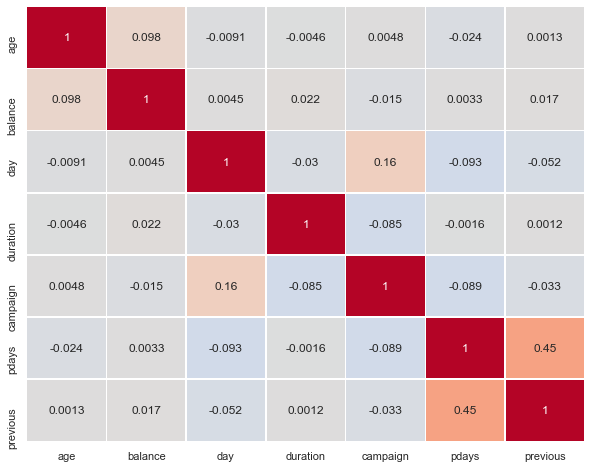

In [27]:
# Correlations heat map

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            center=0,
            cbar=False,
            cmap="coolwarm")
plt.show()


### Insights:
 - 'previous' is correlating with 'pdays' column, so that can be dropped. Plus it seem not to have much of impact on the outcome result (as shown on the violin plot).

In [28]:
df.drop(['previous'], axis=1, inplace=True)


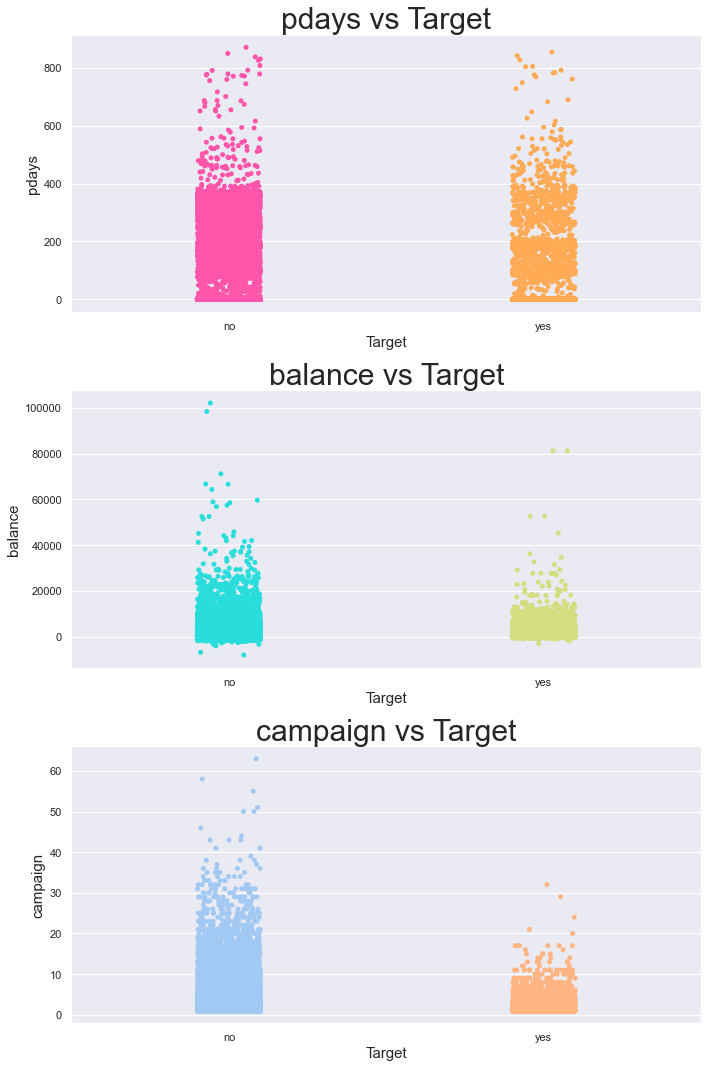

In [30]:
# Striplots of highly skewed numericals vs. categoricals:

plt.rcParams['figure.figsize'] = (10, 15)

labels = ['pdays', 'balance', 'campaign']
palettes = ['spring', 'rainbow', 'pastel']
for index, label in enumerate(labels):
    plt.subplot(3, 1, index+1)
    sns.stripplot(x=df['Target'], y=df[label], palette = palettes[index])
    title = label + ' vs Target' 
    plt.title(title, fontsize = 30)
    plt.ylabel(label, fontsize = 15)
    plt.xlabel('Target', fontsize = 15)
    plt.tight_layout()

In [31]:
grouped = df.groupby(by='Target')
grouped.mean()

,age,balance,day,duration,campaign,pdays
Target,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,37.262261
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,69.342787


### Insights:

** From averaging broad view, factors for 'yes' can be:
- older age
- higher balance
- lower campaign 
- higher pday
- significantly higher duration, but it is unavailable. 

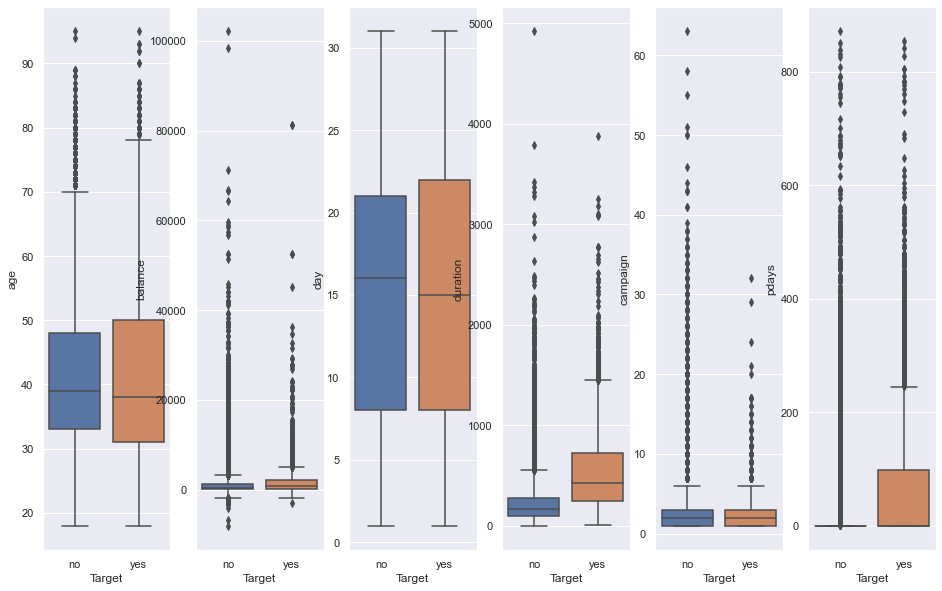

In [32]:
# Boxplots for numericals, to understand distrubutions on 'yes' and 'no', and visualize outliers

features=df.columns[df.dtypes==int]
fig, axs = plt.subplots(ncols = len(features), figsize = (16, 10))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Target', 
                y = field, 
                data = df,
                ax = axs[idx])

## Insights:

** All data is unbalnced, skewed to right, except of 'day', and needs transformations: 

 - age: log transform
 - balance: log transform, with converting 0 and negative values.
 - duration: remove as non-legit
 - campaign: convert to categoricals, 3 types.
 - pdays: convert to categoricals, 2 types.

<AxesSubplot:xlabel='pdays', ylabel='Count'>

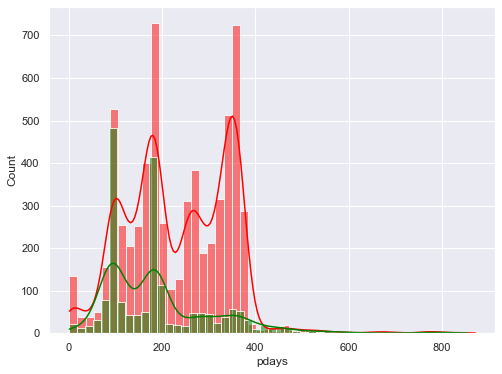

In [33]:
# Isolating highly skwed columns from "0" values to visualize distributions closely 
# and to asign categorical types later on

listpdy=yes_target.loc[yes_target['pdays'] != 0, 'pdays']
listpdn=no_target.loc[no_target['pdays'] != 0, 'pdays']

sns.set(rc={'figure.figsize':(8,6)})

sns.histplot(listpdn, kde=True, bins=50, color='red')
sns.histplot(listpdy, kde=True, bins=50, color='green')

<AxesSubplot:xlabel='balance', ylabel='Count'>

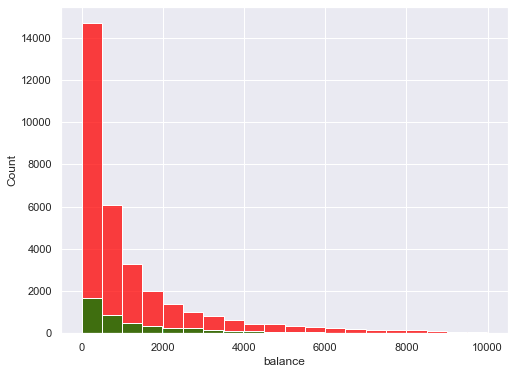

In [34]:
listpdy=yes_target.loc[(yes_target['balance'] > 0) &(yes_target['balance']<10000), 'balance']
listpdn=no_target.loc[(no_target['balance'] > 0) &(no_target['balance']<10000), 'balance']

sns.set(rc={'figure.figsize':(8,6)})

sns.histplot(listpdn, bins=20, color='red')
sns.histplot(listpdy, bins=20, color='green')

<AxesSubplot:xlabel='campaign', ylabel='Count'>

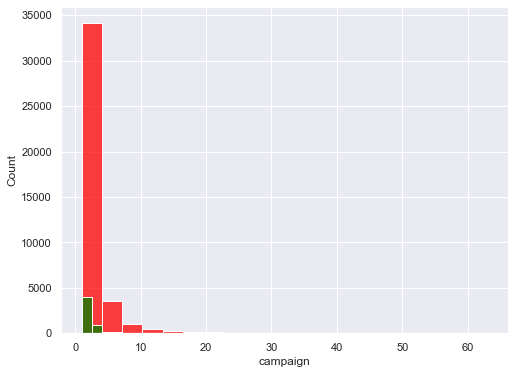

In [35]:
listpdy=yes_target.loc[(yes_target['campaign'] > 0) &(yes_target['campaign']<10000), 'campaign']
listpdn=no_target.loc[(no_target['campaign'] > 0) &(no_target['campaign']<10000), 'campaign']

sns.set(rc={'figure.figsize':(8,6)})

sns.histplot(listpdn, bins=20, color='red')
sns.histplot(listpdy, bins=20, color='green')

<AxesSubplot:xlabel='age', ylabel='Count'>

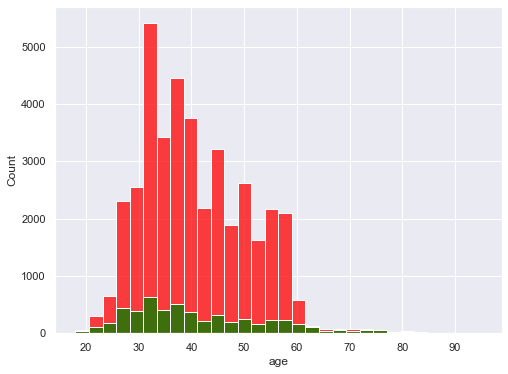

In [36]:
listpdy=yes_target['age']
listpdn=no_target['age']

sns.set(rc={'figure.figsize':(8,6)})

sns.histplot(listpdn, bins=30, color='red')
sns.histplot(listpdy, bins=30, color='green')

### Insights:
- 'pday' are peaking for 'yes' at around 100 and 200 days: asign category for each 100 dyas, then check percent ditribution
- 'campaign' can be asigned two categories, as "0" and "1"

In [37]:
df['pdays_cat']=""
df.loc[(df['pdays']==0), 'pdays_cat']=0

In [39]:
df.loc[(df['pdays']>0) & (df['pdays']<100), 'pdays_cat']=1
df.loc[(df['pdays']>=100) & (df['pdays']<200), 'pdays_cat']=2
df.loc[(df['pdays']>=200) & (df['pdays']<300), 'pdays_cat']=3
df.loc[(df['pdays']>=300) & (df['pdays']<400), 'pdays_cat']=4
df.loc[(df['pdays']>=400), 'pdays_cat']=5

df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,Target,pdays_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,0


In [40]:
df['pdays_cat'].value_counts(normalize=True)*100


0    81.736745
2     6.367919
4     5.005419
3     3.260269
1     3.112074
5     0.517573
Name: pdays_cat, dtype: float64

### Insights:
- Majority 81.7% 'pdays' are belong to value "0", so that two categories only will be asigned to the 'pdays': 0 or 1 otherwise. 
- Majority 'campaign' are 1 and 2, values, so that three categories only will be asigned to the: 1, 2 or 3 otherwise. 

In [42]:
# Copying dataset not to change the original

df1=df.copy()


In [43]:
df1.loc[df1['pdays']>0, 'pdays']=1
df1['pdays'].value_counts(normalize=True)*100


0    81.736745
1    18.263255
Name: pdays, dtype: float64

In [44]:
df1.loc[df1['campaign']>2, 'campaign']=3
df1['campaign'].value_counts(normalize=True)*100

1    38.804716
3    33.536086
2    27.659198
Name: campaign, dtype: float64

**Crosstabs for some categoricals**

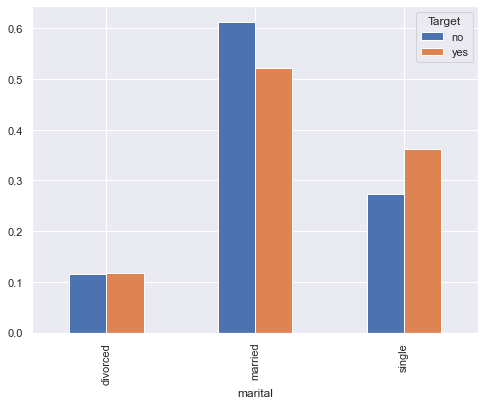

In [54]:
plt.rcParams['figure.figsize'] = (8, 6)
pd.crosstab(df1.marital, df1.Target,normalize='columns').plot(kind='bar');

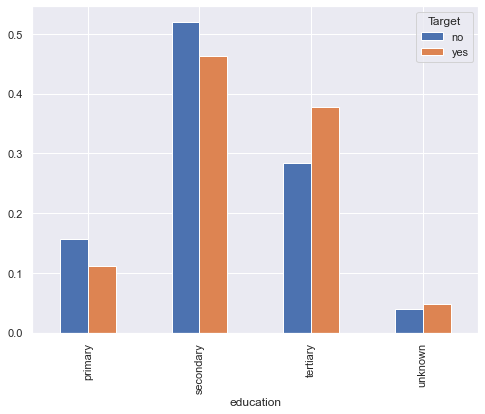

In [53]:
plt.rcParams['figure.figsize'] = (8, 6)
pd.crosstab(df1.education, df1.Target,normalize='columns').plot(kind='bar');

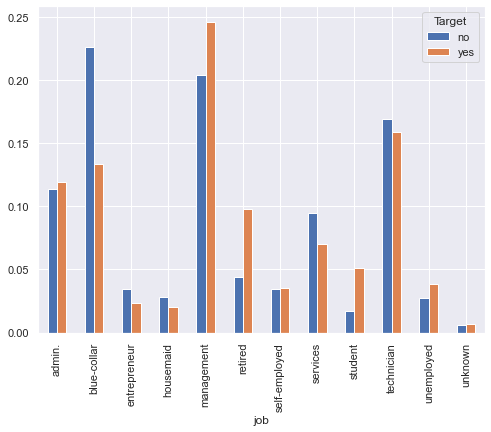

In [52]:
plt.rcParams['figure.figsize'] = (8, 6)
pd.crosstab(df1.job, df1.Target,normalize='columns').plot(kind='bar');

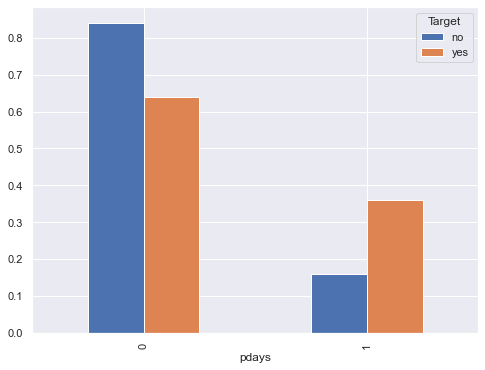

In [51]:
plt.rcParams['figure.figsize'] = (8, 6)
pd.crosstab(df1.pdays, df1.Target,normalize='columns').plot(kind='bar');

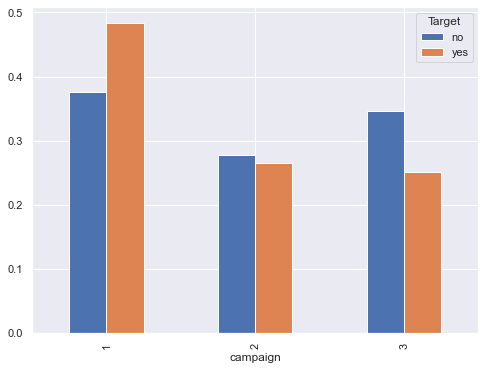

In [50]:
plt.rcParams['figure.figsize'] = (8, 6)
pd.crosstab(df1.campaign, df1.Target,normalize='columns').plot(kind='bar');

### Insights:
 - 'marital': more yes singles
 - 'education': more yes tertiary
 - 'job': more from management, retired, student, unemployed
 - 'pdays': yes contacted previously!
 - 'campaign': cat-1 is the optimum for YES (low # of contacts), then lower for cat-2, then the lowest for cat-3 (high # of contacts). Contact clients to present the information, but then don't bother ('annoy') them too much. Let them think and take a decision by themselves!

In [55]:
wdos=len(df.loc[(df['balance']<0) &(df['Target']=='yes')])
print(f"Percentage of negative balance that bought the term is {round(wdos/len(df)*100, 2)} %")


Percentage of negative balance that bought the term is 0.46 %


***Negative balance can be converted to minimal positive value, as there are only <0.5% of those who purchased the term.

# <a id='link5'>Data Preparation (Transformation and Scaling)</a>

In [56]:
# Lof Transformer

log_transformer = FunctionTransformer(np.log1p)

log_transformer

FunctionTransformer(func=<ufunc 'log1p'>)

In [57]:
df1.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
poutcome     category
Target       category
pdays_cat      object
dtype: object

In [58]:
#Convert 'pdays' and 'campaign' to categoricals

for i in ['pdays', 'campaign']:
    df1[i]=df1[i].astype('category')
df1.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign     category
pdays        category
poutcome     category
Target       category
pdays_cat      object
dtype: object

In [59]:
len(df1.loc[df1['balance']<=0])

7280

In [60]:
print(f"negative and 0 balance were {len(df1.loc[df1['balance']<=0])/len(df1)*100} %")

negative and 0 balance were 16.102275994780033 %


### Insights: 
 - replace negative and 0 balance with 1 for the Log Transformation.

In [61]:
df1.loc[(df1['balance']<=0), 'balance']=1

In [62]:
len(df1.loc[df1['age']==0])

0

In [63]:
# Log transformation for unbalanced columns and to decrease outliers: age and balance

for i in ['age', 'balance']:
    df1[i+'_transformed']=log_transformer.fit_transform(df1[[i]])

df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,Target,pdays_cat,age_transformed,balance_transformed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no,0,4.077537,7.670429
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no,0,3.806662,3.401197
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no,0,3.526361,1.098612
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no,0,3.871201,7.317876
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no,0,3.526361,0.693147


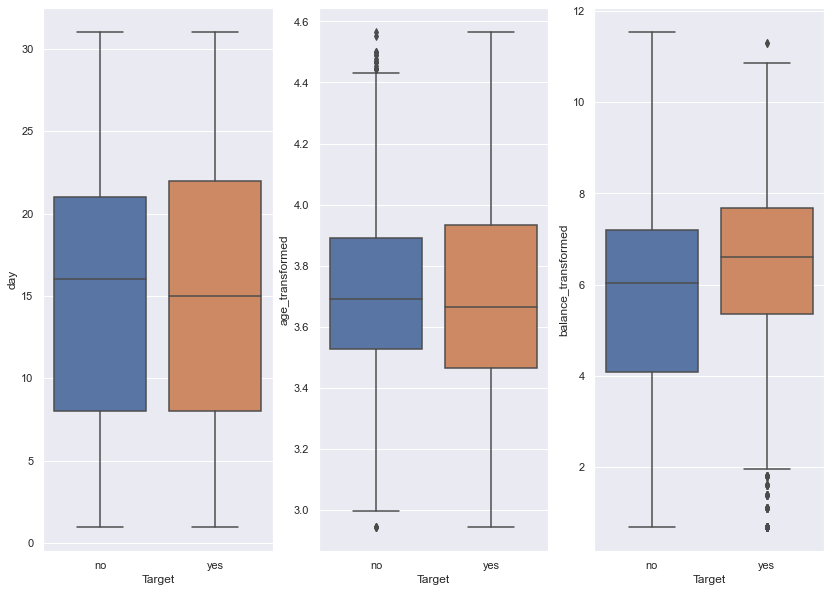

In [64]:
#Re-plotting boxplots for (transformed) numerical values to visulaize outliers

features=['day', 'age_transformed', 'balance_transformed']

fig, axs = plt.subplots(ncols = len(features), figsize = (14, 10))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Target', 
                y = field, 
                data = df1,
                ax = axs[idx])

### Insidhts:
 - Log Transformation significantly decreased the number of outliers for age and balance. The data looks normally distributed now.
 
***Looking at medians***
 - More 'yes' for early day in a months.
 - More 'yes' for clients with higher balance.

### Data Preparation for Modeling

In [65]:
df2=df1.drop(['age', 'balance', 'duration', 'pdays_cat'], axis=1)
df2.dtypes

job                    category
marital                category
education              category
default                category
housing                category
loan                   category
contact                category
day                       int64
month                  category
campaign               category
pdays                  category
poutcome               category
Target                 category
age_transformed         float64
balance_transformed     float64
dtype: object

In [66]:
# Yes/No attributes

features=['Target', 'default', 'housing', 'loan']

for i in features:
    print(df2[i].value_counts(normalize=True))

no     0.883015
yes    0.116985
Name: Target, dtype: float64
no     0.981973
yes    0.018027
Name: default, dtype: float64
yes    0.555838
no     0.444162
Name: housing, dtype: float64
no     0.839774
yes    0.160226
Name: loan, dtype: float64


In [67]:
# Replace Yes/No attributes wth 1/0 respectively
replaceStruct = {
    "default": {"no":0, "yes":1},
    "housing": {"no":0, "yes":1},
    "loan": {"no":0, "yes":1},
    "Target": {"no":0, "yes":1}
}

In [68]:
# For dummies conversion
onehotcols=['job', 'marital', 'education', 'contact', 'month', 'campaign', 'pdays', 'poutcome']

In [69]:
#Copy not to change original structure. Get dummies and restructure

df3=df2.replace(replaceStruct)

df3=pd.get_dummies(df3, columns=onehotcols)

df3.head()


,default,housing,loan,day,Target,age_transformed,balance_transformed,job_admin.,job_blue-collar,job_entrepreneur,...,month_sep,campaign_1,campaign_2,campaign_3,pdays_0,pdays_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,5,0,4.077537,7.670429,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,5,0,3.806662,3.401197,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,1,5,0,3.526361,1.098612,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0,1,0,5,0,3.871201,7.317876,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,5,0,3.526361,0.693147,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [70]:
#Double check the data types now

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   default              45211 non-null  int64  
 1   housing              45211 non-null  int64  
 2   loan                 45211 non-null  int64  
 3   day                  45211 non-null  int64  
 4   Target               45211 non-null  int64  
 5   age_transformed      45211 non-null  float64
 6   balance_transformed  45211 non-null  float64
 7   job_admin.           45211 non-null  uint8  
 8   job_blue-collar      45211 non-null  uint8  
 9   job_entrepreneur     45211 non-null  uint8  
 10  job_housemaid        45211 non-null  uint8  
 11  job_management       45211 non-null  uint8  
 12  job_retired          45211 non-null  uint8  
 13  job_self-employed    45211 non-null  uint8  
 14  job_services         45211 non-null  uint8  
 15  job_student          45211 non-null 

In [71]:
#Astype 'uint8' for integers who are 0 and 1 only

for i in features:
    df3[i]=df3[i].astype('uint8')

#df3.dtypes

In [72]:
#Double check same distrubution for 0 and 1 columns after the changes
for i in features:
    print(df3[i].value_counts(normalize=True))

0    0.883015
1    0.116985
Name: Target, dtype: float64
0    0.981973
1    0.018027
Name: default, dtype: float64
1    0.555838
0    0.444162
Name: housing, dtype: float64
0    0.839774
1    0.160226
Name: loan, dtype: float64


### Data Scaling: Standard

In [73]:
scale_s = StandardScaler()

scale_s

StandardScaler()

In [74]:
scale_mm = MinMaxScaler()

scale_mm

MinMaxScaler()

In [77]:
#This dataset df4 for Standard-scaled data

df4=df3.copy()

for i in ['age_transformed', 'balance_transformed', 'day']:
    df4[i+'_scaled']=scale_s.fit_transform(df4[[i]])

df4.head()

,default,housing,loan,day,Target,age_transformed,balance_transformed,job_admin.,job_blue-collar,job_entrepreneur,...,campaign_3,pdays_0,pdays_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_transformed_scaled,balance_transformed_scaled,day_scaled
0,0,1,0,5,0,4.077537,7.670429,0,0,0,...,0,1,0,0,0,0,1,1.500207,0.870369,-1.298476
1,0,1,0,5,0,3.806662,3.401197,0,0,0,...,0,1,0,0,0,0,1,0.408990,-0.786565,-1.298476
2,0,1,1,5,0,3.526361,1.098612,0,0,1,...,0,1,0,0,0,0,1,-0.720204,-1.680222,-1.298476
3,0,1,0,5,0,3.871201,7.317876,0,1,0,...,0,1,0,0,0,0,1,0.668982,0.733539,-1.298476
4,0,0,0,5,0,3.526361,0.693147,0,0,0,...,0,1,0,0,0,0,1,-0.720204,-1.837587,-1.298476


In [78]:
df4.drop(['age_transformed', 'balance_transformed', 'day'], axis=1, inplace=True)

#df4.info()

In [79]:
#This dataset df5 for MinMax-scaled data
df5=df3.copy()


for i in ['age_transformed', 'balance_transformed', 'day']:
    df5[i+'_scaled']=scale_mm.fit_transform(df5[[i]])

df5.head()

,default,housing,loan,day,Target,age_transformed,balance_transformed,job_admin.,job_blue-collar,job_entrepreneur,...,campaign_3,pdays_0,pdays_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_transformed_scaled,balance_transformed_scaled,day_scaled
0,0,1,0,5,0,4.077537,7.670429,0,0,0,...,0,1,0,0,0,0,1,0.699483,0.643611,0.133333
1,0,1,0,5,0,3.806662,3.401197,0,0,0,...,0,1,0,0,0,0,1,0.532267,0.249801,0.133333
2,0,1,1,5,0,3.526361,1.098612,0,0,1,...,0,1,0,0,0,0,1,0.359231,0.037402,0.133333
3,0,1,0,5,0,3.871201,7.317876,0,1,0,...,0,1,0,0,0,0,1,0.572107,0.611090,0.133333
4,0,0,0,5,0,3.526361,0.693147,0,0,0,...,0,1,0,0,0,0,1,0.359231,0.000000,0.133333


In [80]:
df5.drop(['age_transformed', 'balance_transformed', 'day'], axis=1, inplace=True)
#df5.info()

## Split the Data

In [82]:
X = df3.drop(['Target'], axis=1)                                                 # Log-transformed (LT)
y = df3['Target']    

In [83]:
X1 = df4.drop(['Target'], axis=1)                                                 # LT + Standard scaled
y1 = df4['Target']  

In [84]:
X2 = df5.drop(['Target'], axis=1)                                                 # LT + Min Max Scaled
y2 = df5['Target']  

### Set 1: Log-Transformed (LT)

In [85]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42735, stratify=y)

print(X_train.shape, X_test.shape)

(31647, 49) (13564, 49)


### Set 2:  LT and Standard Scaled

In [86]:
# Splitting data into training and test set:
X1_train, X1_test, y1_train, y1_test =train_test_split(X1, y1, test_size=0.3, random_state=42735, stratify=y1)

print(X1_train.shape, X1_test.shape)


(31647, 49) (13564, 49)


### Set 3:  LT and MinMax Scaled

In [87]:
# Splitting data into training and test set:
X2_train, X2_test, y2_train, y2_test =train_test_split(X2, y2, test_size=0.3, random_state=42735, stratify=y2)

print(X2_train.shape, X2_test.shape)

(31647, 49) (13564, 49)


### Datsets with different scaling are:

- df3 = Log Transformed for unbalanced columns: X, y
- df4 = Log Transformed and Standard scaled: X1, y1
- df5 = Log Transformed and MinMax scaled: X2, y2

In [91]:
#Double checking target variable for all three different scaled sets
y_train.value_counts(normalize=True)

0    0.883022
1    0.116978
Name: Target, dtype: float64

In [92]:
y1_train.value_counts(normalize=True)


0    0.883022
1    0.116978
Name: Target, dtype: float64

In [93]:
y2_train.value_counts(normalize=True)

0    0.883022
1    0.116978
Name: Target, dtype: float64

# <a id='link6'>Predictive Algorithms</a>

## Logistic Regression model

In [94]:
# Data X, y = logreg

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

logreg = LogisticRegression(random_state=856759, fit_intercept=False, solver='liblinear',  class_weight={0:0.1, 1:0.9}, max_iter=1000)
logreg.fit(X_train, y_train)  


LogisticRegression(class_weight={0: 0.1, 1: 0.9}, fit_intercept=False,
                   max_iter=1000, random_state=856759, solver='liblinear')

In [95]:
# Data X1, y1 = logreg1

logreg1 = LogisticRegression(random_state=856759, fit_intercept=False, solver='liblinear', class_weight={0:0.1, 1:0.9}, max_iter=1000)
logreg1.fit(X1_train, y1_train)  

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, fit_intercept=False,
                   max_iter=1000, random_state=856759, solver='liblinear')

In [96]:
# Data X2, y2 = logreg2

logreg2 = LogisticRegression(random_state=856759, fit_intercept=False, solver='liblinear', class_weight={0:0.1, 1:0.9}, max_iter=1000)
logreg2.fit(X2_train, y2_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, fit_intercept=False,
                   max_iter=1000, random_state=856759, solver='liblinear')

In [97]:
# Predict test data
y_predict = logreg.predict(X_test) 

In [98]:
y1_predict = logreg1.predict(X1_test) 
y2_predict = logreg2.predict(X2_test) 

In [99]:
print("Testing accuracies: ",logreg.score(X_test, y_test), logreg1.score(X1_test, y1_test), logreg2.score(X2_test, y2_test))
print()
print("Recalls: ", recall_score(y_test, y_predict), recall_score(y1_test, y1_predict), recall_score(y2_test, y2_predict))
print()
print("F1 Scores: ", f1_score(y_test, y_predict), f1_score(y1_test, y1_predict), f1_score(y2_test, y2_predict))

Testing accuracies:  0.6860070775582424 0.6858596284281923 0.6860808021232675

Recalls:  0.700693131695022 0.702583490863264 0.702583490863264

F1 Scores:  0.3430510566095943 0.3435526113079649 0.34371146732429103


In [232]:
accs=[]
recalls=[]
f1s=[]

In [233]:
#collect scores from DTree Entropy model to compare with others

accs.append(logreg.score(X_test, y_test))
f1s.append(f1_score(y_test, y_predict))
recalls.append(recall_score(y_test, y_predict))

### Insights:

- All three types of data resulting in similar accuracy, F1 scores and recalls (scaling did not increase predictive scores). So that only the first one (Log-transformed) will be used for ease of future use.

<AxesSubplot:>

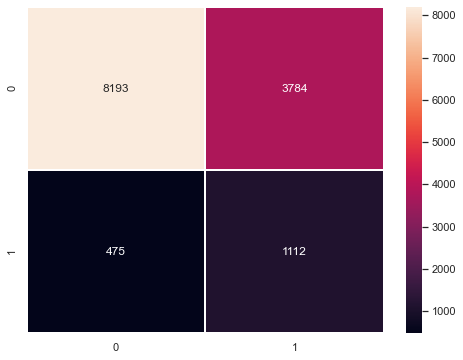

In [100]:
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

## `Decision Tree Entropy Model`

In [203]:
model_entropy = DecisionTreeClassifier(criterion='entropy')

### Applying GridSearchCV to find optimal model parameters for the Recall score 
 - Find, predict max potential customers

In [105]:
model_entropy.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [204]:
params={'max_depth': [3, 5, 7, 9],
       'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.5, 1:0.5}, {0:0.7, 1:0.3}],
       'min_impurity_decrease':[0.01, 0.02, 0.05]}

In [205]:
#GridSearchCV?

In [206]:
grid = GridSearchCV(model_entropy, params, scoring='recall', verbose=3)

In [207]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01, score=0.657, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01, score=0.653, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01, score=0.645, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01, score=0.674, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.01, score=0.659, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02, score=0.922, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02, score=0.892, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02, score=0.889, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_impurity_decrease=0.02, score=0.903,

[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02, score=0.892, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02, score=0.889, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02, score=0.903, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.02, score=0.897, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.05, score=0.192, total=   0.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=9, min_impurity_decrease=0.05, score=0.184,

[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.02, score=0.180, total=   0.1s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05, score=0.192, total=   0.1s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05, score=0.184, total=   0.1s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05, score=0.195, total=   0.1s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05, score=0.192, total=   0.1s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=7, min_impurity_decrease=0.05, score=0.180,

[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_impurity_decrease=0.05, score=0.195, total=   0.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_impurity_decrease=0.05, score=0.192, total=   0.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_impurity_decrease=0.05, score=0.180, total=   0.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=7, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=7, min_impurity_decrease=0.01, score=0.192, total=   0.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=7, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=7, min_impurity_decrease=0.01, score=0.184, total=   0.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=7, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=7, min_impurity_decrease=0.01, score=0.195,

[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=3, min_impurity_decrease=0.05, score=0.000, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.5}, max_depth=3, min_impurity_decrease=0.05 
[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=3, min_impurity_decrease=0.05, score=0.000, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01, score=0.192, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01, score=0.184, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01, score=0.195, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=5, min_impurity_decrease=0.01, score=0.192,

[CV]  class_weight={0: 0.5, 1: 0.5}, max_depth=9, min_impurity_decrease=0.05, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=3, min_impurity_decrease=0.01, score=0.000,

[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.01 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.01, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.02, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.02 
[CV]  class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.02, score=0.000, total=   0.1s
[CV] class_weight={0: 0.7, 1: 0.3}, max_depth=9, min_impurity_decrease=0.02 
[CV]  class_w

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   23.5s finished


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}, {0: 0.5, 1: 0.5},
                                          {0: 0.7, 1: 0.3}],
                         'max_depth': [3, 5, 7, 9],
                         'min_impurity_decrease': [0.01, 0.02, 0.05]},
             scoring='recall', verbose=3)

In [208]:
print(grid.best_params_)

{'class_weight': {0: 0.1, 1: 0.9}, 'max_depth': 3, 'min_impurity_decrease': 0.02}


In [209]:
print(grid.best_score_)

0.9005908742750848


In [210]:
predictions_entr = grid.predict(X_test)

In [211]:
gs_train_score=grid.score(X_train, y_train)
gs_test_score=grid.score(X_test, y_test)

print(f"Training Data Score: {gs_train_score}")
print(f"Testing Data Score: {gs_test_score}")

Training Data Score: 0.9005942733657483
Testing Data Score: 0.8998109640831758


In [212]:
print(classification_report(y_test, predictions_entr))

              precision    recall  f1-score   support

           0       0.96      0.31      0.47     11977
           1       0.15      0.90      0.25      1587

    accuracy                           0.38     13564
   macro avg       0.55      0.60      0.36     13564
weighted avg       0.86      0.38      0.44     13564



<AxesSubplot:>

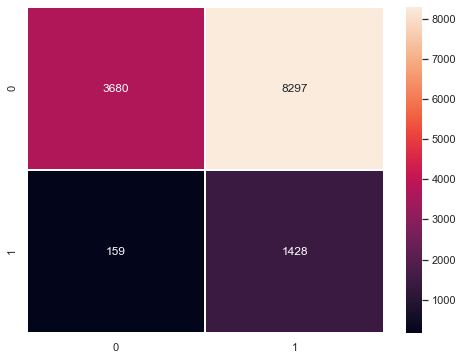

In [213]:
# Confusion matrix

cf_matrix = confusion_matrix(y_test, predictions_entr)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Insights:
- Inspite of the very high Recall score (low FN), the model has low accuracy and precision on FP: too many people wihtout actual interest in the product can be contacted (it aligns with overall advertisement impression in my life).
- For actual predictions and tree visualization <b> removing the 'min_impurity_decrease': 0.02 </b> found by the GridSearch.

## Tree Visualization

In [123]:
from sklearn.tree import export_graphviz  
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz

In [217]:
features = [col for col in df3.columns if col != 'Target']
#model_entropy

In [221]:
model_entropy = DecisionTreeClassifier(criterion='entropy', class_weight={0: 0.1, 1: 0.9},
                       max_depth=3)

In [222]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=3)

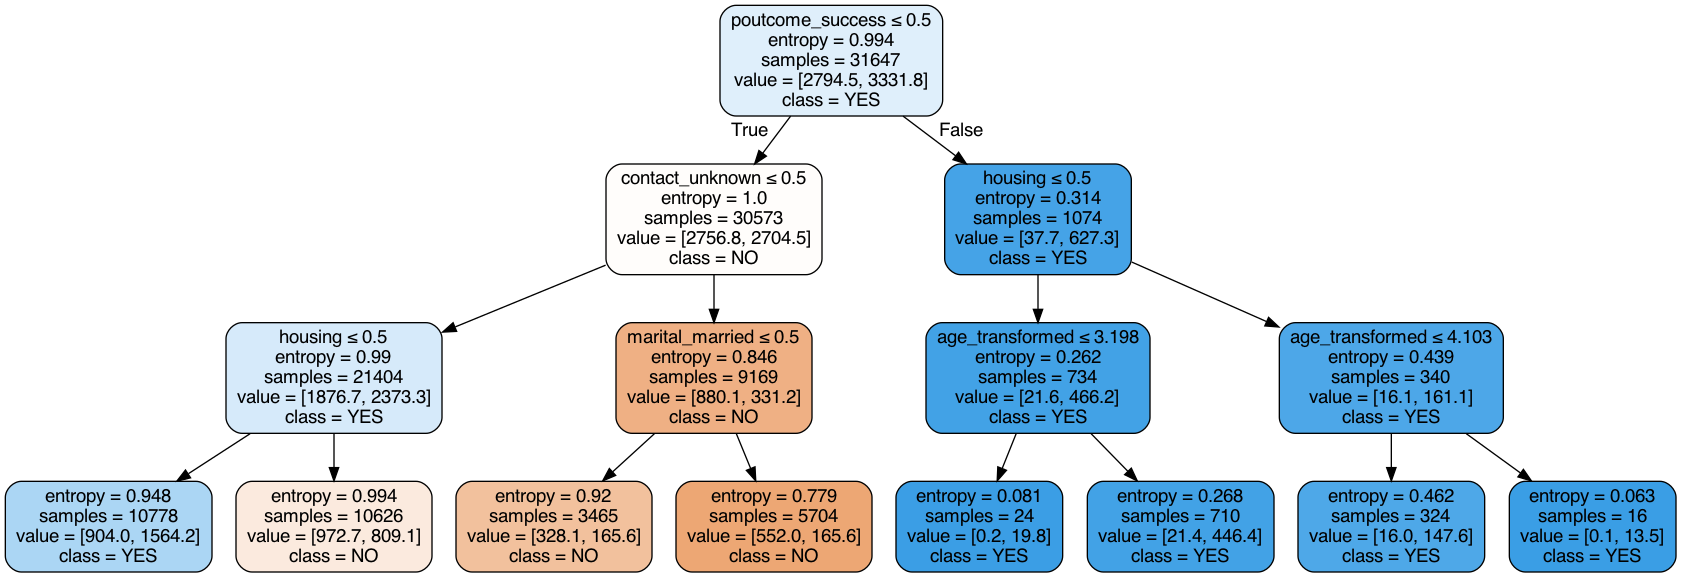

In [223]:
dot_data = StringIO()
export_graphviz(model_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features, class_names=['NO','YES'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('term_deposit_entr.png')
Image(graph.create_png())

In [224]:
predictions_entr = model_entropy.predict(X_test)

In [225]:
print(classification_report(y_test, predictions_entr))

              precision    recall  f1-score   support

           0       0.93      0.66      0.78     11977
           1       0.20      0.64      0.31      1587

    accuracy                           0.66     13564
   macro avg       0.57      0.65      0.54     13564
weighted avg       0.85      0.66      0.72     13564



In [227]:
acc_entr = accuracy_score(y_test, predictions_entr)
acc_entr=round(acc_entr,2)

f1=f1_score(y_test, predictions_entr)
f1=round(f1, 2)

recall_entr=recall_score(y_test, predictions_entr)
recall_entr=round(recall_entr,2)

print("Entropy classifier Accuracy, Recall and F1: ", acc_entr, recall_entr, f1)

Entropy classifier Accuracy, Recall and F1:  0.66 0.64 0.31


In [235]:
#collect scores from DTree Entropy model to compare with others

accs.append(acc_entr)
f1s.append(f1)
recalls.append(recall_entr)

##  `Random Forest Model`

In [239]:
from sklearn.ensemble import RandomForestClassifier


In [245]:
rfcl = RandomForestClassifier(criterion = 'entropy')

### Applying GridSearchCV to find optimal model parameters for the Recall score 
 - Find, predict max potential customers

In [241]:
rfcl.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [246]:
params={'max_depth': [3, 4, 5],
       'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}],
       'min_samples_leaf':[20, 50],
       'warm_start':[True, False]}

In [247]:
grid = GridSearchCV(rfcl, params, scoring='recall', verbose=3)

In [248]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True, score=0.835, total=   1.1s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True, score=0.845, total=   1.0s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True, score=0.776, total=   1.0s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True, score=0.846, total=   1.0s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=True, score=0.838, total=   1.0s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.849, total=   1.0s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.831, total=   1.0s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=3, min_samples_leaf=20, war

[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=True, score=0.781, total=   1.4s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=True 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=True, score=0.726, total=   1.3s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.789, total=   1.3s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.794, total=   1.3s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.749, total=   1.4s
[CV] class_weight={0: 0.1, 1: 0.9}, max_depth=5, min_samples_leaf=20, w

[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=True, score=0.257, total=   1.2s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False, score=0.263, total=   1.2s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False, score=0.248, total=   1.2s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False, score=0.284, total=   1.2s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20, warm_start=False, score=0.295, total=   1.2s
[CV] class_weight={0: 0.2, 1: 0.8}, max_depth=4, min_samples_leaf=20,

[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.177, total=   1.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.184, total=   1.0s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.185, total=   1.1s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.181, total=   1.0s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=20, warm_start=False, score=0.180, total=   1.2s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=3, min_samples_leaf=50

[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.184, total=   1.3s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.200, total=   1.5s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.193, total=   1.4s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=20, warm_start=False, score=0.178, total=   1.4s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=50, warm_start=True 
[CV]  class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=50, warm_start=True, score=0.190, total=   1.3s
[CV] class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=50, 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.7min finished


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [20, 50],
                         'warm_start': [True, False]},
             scoring='recall', verbose=3)

In [249]:
print(grid.best_params_

{'class_weight': {0: 0.1, 1: 0.9}, 'max_depth': 3, 'min_samples_leaf': 20, 'warm_start': False}


In [250]:
predictions_rf = grid.predict(X_test)

In [251]:
gs_train_score=grid.score(X_train, y_train)
gs_test_score=grid.score(X_test, y_test)

print(f"Training Data Score: {gs_train_score}")
print(f"Testing Data Score: {gs_test_score}")

Training Data Score: 0.8252296056185845
Testing Data Score: 0.8103339634530561


In [252]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     11977
           1       0.17      0.81      0.28      1587

    accuracy                           0.50     13564
   macro avg       0.56      0.64      0.45     13564
weighted avg       0.86      0.50      0.58     13564



In [253]:
acc_entr = accuracy_score(y_test, predictions_rf)
acc_entr=round(acc_entr,2)

f1=f1_score(y_test, predictions_rf)
f1=round(f1, 2)

recall_entr=recall_score(y_test, predictions_rf)
recall_entr=round(recall_entr,2)

print("RF classifier Accuracy, Recall and F1: ", acc_entr, recall_entr, f1)

RF classifier Accuracy, Recall and F1:  0.5 0.81 0.28


In [254]:
#collect scores from the model to compare with others

accs.append(acc_entr)
f1s.append(f1)
recalls.append(recall_entr)

<AxesSubplot:>

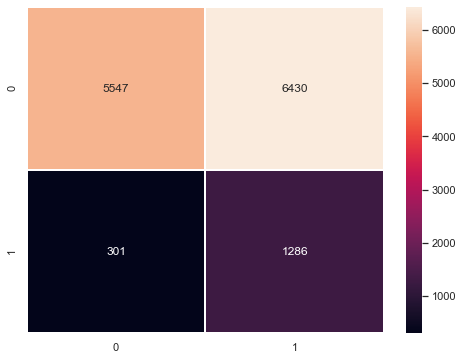

In [262]:
cf_matrix = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

## `Adaboost Ensemble Algorithm`


In [281]:
from sklearn.ensemble import AdaBoostClassifier

In [289]:
abcl = AdaBoostClassifier(random_state=473)

### Applying GridSearchCV to find optimal model parameters for the Recall score 
 - Find, predict max potential customers

In [259]:
abcl.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [290]:
params={'learning_rate': [0.5, 2],
       'n_estimators':[100, 200]}

In [291]:
grid = GridSearchCV(abcl, params, scoring='recall', verbose=3)

In [292]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.5, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . learning_rate=0.5, n_estimators=100, score=0.163, total=   3.0s
[CV] learning_rate=0.5, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] . learning_rate=0.5, n_estimators=100, score=0.181, total=   2.8s
[CV] learning_rate=0.5, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] . learning_rate=0.5, n_estimators=100, score=0.200, total=   2.8s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.181, total=   2.9s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV] . learning_rate=0.5, n_estimators=100, score=0.169, total=   2.9s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.166, total=   5.6s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.181, total=   5.8s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.207, total=   5.6s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] . learning_rate=0.5, n_estimators=200, score=0.186, total=   5.6s
[CV] learning_rate=0.5, n_estimators=200 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.4min finished


GridSearchCV(estimator=AdaBoostClassifier(random_state=473),
             param_grid={'learning_rate': [0.5, 2], 'n_estimators': [100, 200]},
             scoring='recall', verbose=3)

In [293]:
print(grid.best_params_)

{'learning_rate': 2, 'n_estimators': 100}


In [294]:
predictions_ab = grid.predict(X_test)

In [295]:
gs_train_score=grid.score(X_train, y_train)
gs_test_score=grid.score(X_test, y_test)

print(f"Training Data Score: {gs_train_score}")
print(f"Testing Data Score: {gs_test_score}")

Training Data Score: 0.1882766072393301
Testing Data Score: 0.1770636420919975


In [297]:
print(classification_report(y_test, predictions_ab))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.64      0.18      0.28      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



In [298]:
acc_entr = accuracy_score(y_test, predictions_ab)
acc_entr=round(acc_entr,2)

f1=f1_score(y_test, predictions_ab)
f1=round(f1, 2)

recall_entr=recall_score(y_test, predictions_ab)
recall_entr=round(recall_entr,2)

print("AdaBoost classifier Accuracy, Recall and F1: ", acc_entr, recall_entr, f1)


AdaBoost classifier Accuracy, Recall and F1:  0.89 0.18 0.28


In [299]:
#collect scores from the model to compare with others

accs.append(acc_entr)
f1s.append(f1)
recalls.append(recall_entr)

<AxesSubplot:>

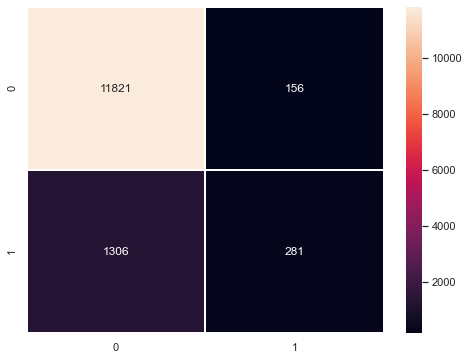

In [302]:
cf_matrix = confusion_matrix(y_test, predictions_ab)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

## Bagging Classifier Algorithm

In [303]:
from sklearn.ensemble import BaggingClassifier

In [318]:
#BaggingClassifier?

In [317]:
bgcl = BaggingClassifier(random_state=473)

### Applying GridSearchCV to find optimal model parameters for the Recall score 
 - Find, predict max potential customers

In [305]:
bgcl.get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [319]:
params={'max_samples': [0.1, 0.3, 0.7],
       'n_estimators':[5, 20, 50],
       'warm_start':[True, False]}

In [320]:
grid = GridSearchCV(bgcl, params, scoring='recall', verbose=3)

In [321]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_samples=0.1, n_estimators=5, warm_start=True ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_samples=0.1, n_estimators=5, warm_start=True, score=0.265, total=   0.3s
[CV] max_samples=0.1, n_estimators=5, warm_start=True ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_samples=0.1, n_estimators=5, warm_start=True, score=0.254, total=   0.3s
[CV] max_samples=0.1, n_estimators=5, warm_start=True ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  max_samples=0.1, n_estimators=5, warm_start=True, score=0.255, total=   0.2s
[CV] max_samples=0.1, n_estimators=5, warm_start=True ................
[CV]  max_samples=0.1, n_estimators=5, warm_start=True, score=0.239, total=   0.2s
[CV] max_samples=0.1, n_estimators=5, warm_start=True ................
[CV]  max_samples=0.1, n_estimators=5, warm_start=True, score=0.250, total=   0.2s
[CV] max_samples=0.1, n_estimators=5, warm_start=False ...............
[CV]  max_samples=0.1, n_estimators=5, warm_start=False, score=0.265, total=   0.2s
[CV] max_samples=0.1, n_estimators=5, warm_start=False ...............
[CV]  max_samples=0.1, n_estimators=5, warm_start=False, score=0.254, total=   0.2s
[CV] max_samples=0.1, n_estimators=5, warm_start=False ...............
[CV]  max_samples=0.1, n_estimators=5, warm_start=False, score=0.255, total=   0.2s
[CV] max_samples=0.1, n_estimators=5, warm_start=False ...............
[CV]  max_samples=0.1, n_estimators=5, warm_start=False, score=0.239, tot

[CV]  max_samples=0.3, n_estimators=50, warm_start=False, score=0.213, total=   4.0s
[CV] max_samples=0.3, n_estimators=50, warm_start=False ..............
[CV]  max_samples=0.3, n_estimators=50, warm_start=False, score=0.216, total=   4.0s
[CV] max_samples=0.3, n_estimators=50, warm_start=False ..............
[CV]  max_samples=0.3, n_estimators=50, warm_start=False, score=0.218, total=   4.3s
[CV] max_samples=0.3, n_estimators=50, warm_start=False ..............
[CV]  max_samples=0.3, n_estimators=50, warm_start=False, score=0.219, total=   4.2s
[CV] max_samples=0.3, n_estimators=50, warm_start=False ..............
[CV]  max_samples=0.3, n_estimators=50, warm_start=False, score=0.214, total=   4.8s
[CV] max_samples=0.7, n_estimators=5, warm_start=True ................
[CV]  max_samples=0.7, n_estimators=5, warm_start=True, score=0.271, total=   0.9s
[CV] max_samples=0.7, n_estimators=5, warm_start=True ................
[CV]  max_samples=0.7, n_estimators=5, warm_start=True, score=0.25

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.5min finished


GridSearchCV(estimator=BaggingClassifier(random_state=473),
             param_grid={'max_samples': [0.1, 0.3, 0.7],
                         'n_estimators': [5, 20, 50],
                         'warm_start': [True, False]},
             scoring='recall', verbose=3)

In [322]:
print(grid.best_params_)

{'max_samples': 0.7, 'n_estimators': 5, 'warm_start': True}


In [323]:
predictions_bg = grid.predict(X_test)

In [324]:
gs_train_score=grid.score(X_train, y_train)
gs_test_score=grid.score(X_test, y_test)

print(f"Training Data Score: {gs_train_score}")
print(f"Testing Data Score: {gs_test_score}")

Training Data Score: 0.7552674230145867
Testing Data Score: 0.2696912413358538


In [325]:
print(classification_report(y_test, predictions_bg))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11977
           1       0.45      0.27      0.34      1587

    accuracy                           0.88     13564
   macro avg       0.68      0.61      0.64     13564
weighted avg       0.85      0.88      0.86     13564



In [329]:
acc_entr = accuracy_score(y_test, predictions_bg)
acc_entr=round(acc_entr,2)

f1=f1_score(y_test, predictions_bg)
f1=round(f1, 2)

recall_entr=recall_score(y_test, predictions_bg)
recall_entr=round(recall_entr,2)

print("Bagging classifier Accuracy, Recall and F1: ", acc_entr, recall_entr, f1)

Bagging classifier Accuracy, Recall and F1:  0.88 0.27 0.34


In [327]:
#collect scores from the model to compare with others

accs.append(acc_entr)
f1s.append(f1)
recalls.append(recall_entr)

<AxesSubplot:>

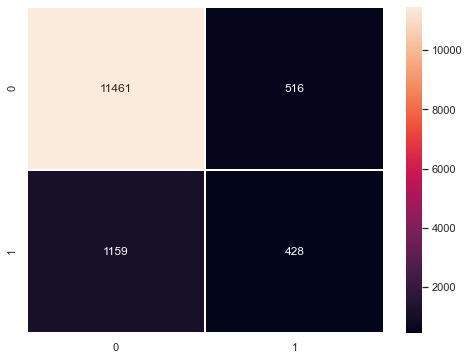

In [328]:
cf_matrix = confusion_matrix(y_test, predictions_bg)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

## `GradientBoost Classifier Algorithm`

In [331]:
from sklearn.ensemble import GradientBoostingClassifier

In [340]:
#GradientBoostingClassifier?

In [341]:
gbcl = GradientBoostingClassifier(random_state=473)

### Applying GridSearchCV to find optimal model parameters for the Recall score 
 - Find, predict max potential customers

In [333]:
gbcl.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [343]:
params={'max_depth': [3, 4, 5],
       'learning_rate': [0.5, 3],
        'min_impurity_decrease':[0.02, 0.05],
        'n_estimators':[20, 50],
       'warm_start':[True, False]}

In [344]:
grid = GridSearchCV(gbcl, params, scoring='recall', verbose=3)

In [345]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.217, total=   1.1s
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.211, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.223, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.211, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.207, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=False, score=0.217, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start=False 
[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.02, n_estimators=20, warm_start

[CV]  learning_rate=0.5, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.208, total=   2.3s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.211, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.219, total=   1.3s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True, score=0.238, total=   1.2s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.02, n_estimators=20, warm_start=T

[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.236, total=   2.5s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.253, total=   3.0s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.272, total=   3.2s
[CV] learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False 
[CV]  learning_rate=0.5, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.227, total=   2.5s
[CV] learning_rate=0.5, max_depth=5, min_impurity_decrease=0.02, n_estimators=20, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_impurity_decrease=0.02, n_estimators=20, warm_s

[CV]  learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.266, total=   3.5s
[CV] learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.241, total=   3.4s
[CV] learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.235, total=   3.6s
[CV] learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=False, score=0.228, total=   3.3s
[CV] learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_start=False 
[CV]  learning_rate=0.5, max_depth=5, min_impurity_decrease=0.05, n_estimators=50, warm_sta

[CV]  learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.808, total=   2.2s
[CV] learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.709, total=   2.2s
[CV] learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.805, total=   2.2s
[CV] learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.966, total=   2.1s
[CV] learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=3, max_depth=3, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.297, t

[CV]  learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=0.665, total=   1.2s
[CV] learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=20, warm_start=False 
[CV]  learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=0.254, total=   1.2s
[CV] learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=20, warm_start=False 
[CV]  learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=0.224, total=   1.2s
[CV] learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.960, total=   2.8s
[CV] learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=True 
[CV]  learning_rate=3, max_depth=4, min_impurity_decrease=0.05, n_estimators=50, warm_start=True, score=0.9

[CV]  learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=True, score=0.868, total=   1.5s
[CV] learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False 
[CV]  learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=0.935, total=   1.5s
[CV] learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False 
[CV]  learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=0.244, total=   1.4s
[CV] learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False 
[CV]  learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=0.688, total=   1.4s
[CV] learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False 
[CV]  learning_rate=3, max_depth=5, min_impurity_decrease=0.05, n_estimators=20, warm_start=False, score=

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  8.4min finished


GridSearchCV(estimator=GradientBoostingClassifier(random_state=473),
             param_grid={'learning_rate': [0.5, 3], 'max_depth': [3, 4, 5],
                         'min_impurity_decrease': [0.02, 0.05],
                         'n_estimators': [20, 50],
                         'warm_start': [True, False]},
             scoring='recall', verbose=3)

In [346]:
print(grid.best_params_)

{'learning_rate': 3, 'max_depth': 3, 'min_impurity_decrease': 0.02, 'n_estimators': 20, 'warm_start': True}


In [347]:
predictions_gb = grid.predict(X_test)

In [348]:
gs_train_score=grid.score(X_train, y_train)
gs_test_score=grid.score(X_test, y_test)

print(f"Training Data Score: {gs_train_score}")
print(f"Testing Data Score: {gs_test_score}")

Training Data Score: 0.8111831442463533
Testing Data Score: 0.8229363579080026


In [349]:
print(classification_report(y_test, predictions_gb))

              precision    recall  f1-score   support

           0       0.35      0.01      0.02     11977
           1       0.10      0.82      0.18      1587

    accuracy                           0.11     13564
   macro avg       0.23      0.42      0.10     13564
weighted avg       0.32      0.11      0.04     13564



In [350]:
acc_entr = accuracy_score(y_test, predictions_gb)
acc_entr=round(acc_entr,2)

f1=f1_score(y_test, predictions_gb)
f1=round(f1, 2)

recall_entr=recall_score(y_test, predictions_gb)
recall_entr=round(recall_entr,2)

print("GradientBoost classifier Accuracy, Recall and F1: ", acc_entr, recall_entr, f1)

GradientBoost classifier Accuracy, Recall and F1:  0.11 0.82 0.18


In [351]:
#collect scores from the model to compare with others

accs.append(acc_entr)
f1s.append(f1)
recalls.append(recall_entr)

<AxesSubplot:>

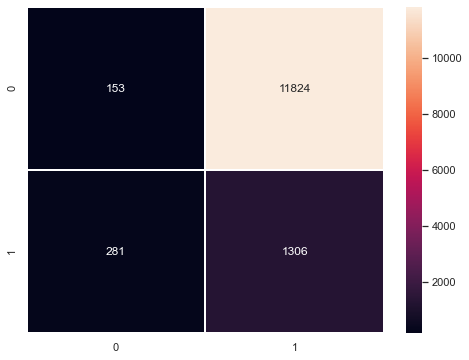

In [352]:
cf_matrix = confusion_matrix(y_test, predictions_gb)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [355]:
#round first item in collected lists

accs[0]=round(accs[0], 2)
recalls[0]=round(recalls[0], 2)
f1s[0]=round(f1s[0], 2)

recalls

[0.7, 0.64, 0.81, 0.18, 0.27, 0.82]

## Summary 

In [356]:
models=['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'Adaboost', 'Bagging', 'Gradient_Boost']


In [357]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':models, 'accuracy': accs, 'recall': recalls, 'f1-score': f1s})
resultsDf = resultsDf[['Method', 'accuracy', 'recall', 'f1-score']]
resultsDf

,Method,accuracy,recall,f1-score
0,Logistic_Regression,0.69,0.70,0.34
1,Decision_Tree,0.66,0.64,0.31
2,Random_Forest,0.50,0.81,0.28
3,Adaboost,0.89,0.18,0.28
4,Bagging,0.88,0.27,0.34
5,Gradient_Boost,0.11,0.82,0.18


## Modeling Outcome Insights :

**For the best balance between Recall and accuracy, with lower number of FPs, best scores were found for: 

 - Logistic Regression
 - Random Forest

In [358]:
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0: 0.1, 1: 0.9},
                             max_depth=3, min_samples_leaf=20, warm_start=False)

In [359]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=3, min_samples_leaf=20)

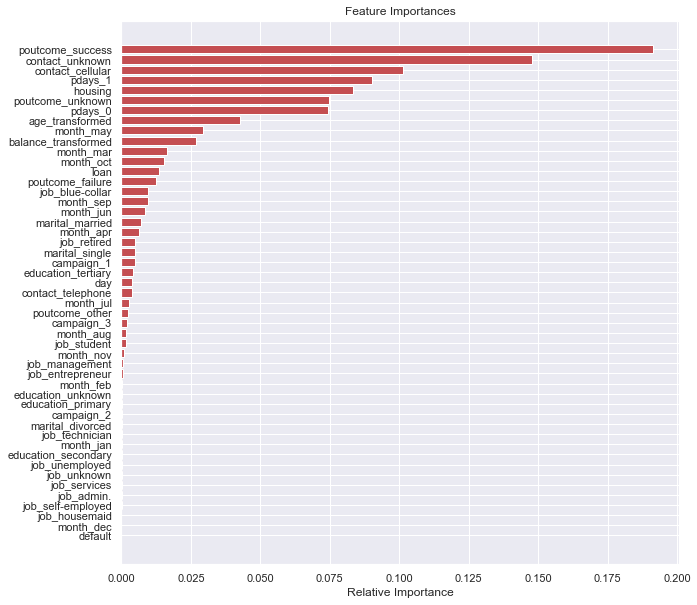

In [360]:
# Feature Importance from Random Forest

importances = rfcl.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Insights:

- **Important features are:**
    - poutcome (outcome from previous campaign)
    - contact_uknown
    - contact_cellular
    - pdays_1: number of days that passed by after the client was last contacted from a previous campaign is non-zero (or less than 900 days), means yes-contacted , contacted recently, and not a while ago.
    - housing
    - poutcome_uknown
    - etc. more than 20 features were found to be significant

# <a id='link7'>Conclusions</a>

- Analysed the "Term deposit Sale" using Logistic Regression, Decision Tree Classifier, Random Forest, Bagging and Boosting Classifiers to build a predictive model for the same.
- The model can be used to predict if future customers can be interested in purchasing the bank Term Deposit or not, based on their characteristics. Those who will be predicted for 'YES' can be contacted to suggest the product.

- Using Grid Search to find the best parameters for different classifiers, it is easy to 'overfit' the modeling on high recall scores only, which results in poor precision and too many FP (false positive predictions):
  - Too many FPs will make the marketing team to waste their resources on the customers who will not be interested/able to purchase the product (and annoy the customers); 
  - Too many FN (low recall score) will results in loosing money from missing future potential customers
  
**Good balance between the Recall and Precision scores were found from Logistic Regression and Random Forest algorithms.**
  
**Actual balance between the Recall and Precision scores are decisions need to be taken by the business itself.**


# **Inferences:**

- Proportion of yes-customers is higher for previously, but recently contacted people with successful or unclear (unknown) outcomes.
- More sales from customers contacted in a beginning or mid month, hot months are in spring and summer.
- Housing (yes/no) and age combinations are other importance factors.

# **Recommendations:**

- Suggets term deposit sale for customers with the previous contact history, although limit number of contacts to minimal letting customers take a thoughtful decisions by themselves.
- Browsing new Customers: consider marital status, age, finance situation (housing, balance in bank, loans), and use  predictive algorithms :)